## Exploration of SIgnal Detection data

This notebook quickly summarizes a run of the Signal Detection task, by counting the amount of nans, answers to 0-opacity trials, as well as plotting the psychophysical curves on basis of the data.

After inspecting the data it was discovered that of course, one needs to 'flip' the data for 0-opacity, for plotting onto the psychophysical curve, as the responses are coded as correct/false in the output of the experiment.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
subnrs = ['97', '01']
ops = []
resps = []
subs = []

for subnr in subnrs:
#     subnr = '97'
    data_path = f'detection_data/{subnr}/{subnr}_events.tsv'
    dat = pd.read_csv(data_path, sep='\t')
    for trial in dat.trial_nr.unique():
    #     print(trial)
        trial_df = dat[dat.trial_nr == trial]
        opacity = trial_df.signal_opacity.iloc[0]
        try:
            response_correct = trial_df[trial_df.event_type == 'response'].correct.values[0]
        except IndexError:
            response_correct = None
        ops.append(opacity)
        resps.append(response_correct)
        subs.append(subnr)
        
resps_df = pd.DataFrame({'opacity' : ops,'response' : resps, 'subject': subs})
resps_df

,opacity,response,subject
0,0.000,NaN,97
1,0.000,1.0,97
2,0.000,0.0,97
3,0.000,0.0,97
4,0.010,1.0,97
...,...,...,...
795,0.000,0.0,01
796,0.000,1.0,01
797,0.040,1.0,01
798,0.005,0.0,01


In [23]:
# descriptive checks
for subnr in subnrs:
    # count nans
    print(f'subject {subnr} has {resps_df[resps_df.subject == subnr].response.isna().sum()} of 400 missing values')
    print(f'subject {subnr} has responded {resps_df[(resps_df.subject == subnr) & (resps_df.opacity == 0)].response.sum()} times "yes" to empty trials')    

subject 97 has 15 of 400 missing values
subject 97 has responded 145.0 times "yes" to empty trials
subject 01 has 11 of 400 missing values
subject 01 has responded 175.0 times "yes" to empty trials


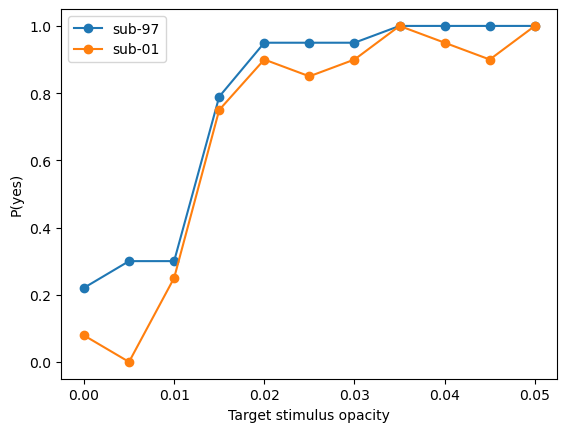

In [25]:
fig, ax =  plt.subplots()

for subnr in subnrs:
    means = []
    stds = []
    sub_df = resps_df[resps_df.subject == subnr]

    ops = sub_df.opacity.unique()
    ops.sort()
    for op in ops:
#         print(op)    
        mean = sub_df[sub_df.opacity == op].response.mean()
        std = sub_df[sub_df.opacity == op].response.std()
        
        # flip answers for 0-opacity
        if op == 0.0:
            mean = 1-mean
        
        means.append(mean)
        stds.append(std)
        
    ax.plot(ops, means, marker = 'o', label = f'sub-{subnr}')
    

ax.set_xlabel('Target stimulus opacity')
ax.set_ylabel('P(yes)')
ax.legend()


## Notes

For the first two pilots, subjects 97 and 01, there is a weird pattern in 